In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

## Define Multiple Models
In the functional API, models are created by specifying their inputs and outputs in a graph of layers. That means that a single graph of layers can be used to generate multiple models.

In the example below, you use the same stack of layers to instantiate two models: an <b>encoder</b> model that turns image inputs into 16-dimensional vectors, and an end-to-end <b>autoencoder</b> model for training.

## Encoder

In [2]:
encoder_input=keras.Input(shape=(28,28,1),name='img')

x=layers.Conv2D(16,3,activation='relu')(encoder_input)
x=layers.Conv2D(32,3,activation='relu')(x)
x=layers.MaxPooling2D(3)(x)
x=layers.Conv2D(32,3,activation='relu')(x)
x=layers.Conv2D(16,3,activation='relu')(x)

encoder_output=layers.GlobalMaxPooling2D()(x)

In [3]:
encoder=keras.Model(encoder_input,encoder_output,name='encoder')

In [4]:
encoder.summary()

Model: "encoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
img (InputLayer)             [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 26, 26, 16)        160       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 32)        4640      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 6, 6, 32)          9248      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 4, 4, 16)          4624      
_________________________________________________________________
global_max_pooling2d (Global (None, 16)                0   

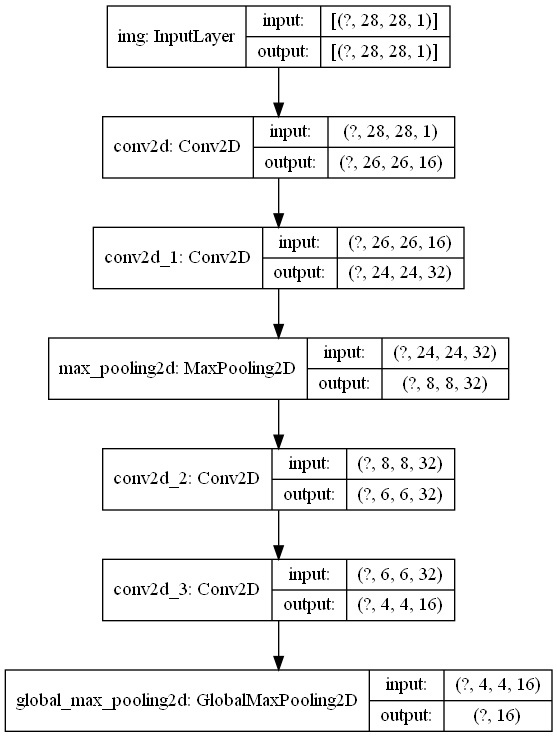

In [5]:
keras.utils.plot_model(encoder,'Encoder Diagram.png',show_shapes=True)

## Decoder

In [7]:
x=layers.Reshape((4,4,1))(encoder_output)
x=layers.Conv2DTranspose(16,3,activation='relu')(x)
x=layers.Conv2DTranspose(32,3,activation='relu')(x)
x=layers.UpSampling2D(3)(x)
x=layers.Conv2DTranspose(16,3,activation='relu')(x)

decoder_output=layers.Conv2DTranspose(1,3,activation='relu')(x)


## Autoencoder

In [13]:
autoencoder=keras.Model(encoder_input,decoder_output,name='autoencoder')

In [14]:
autoencoder.summary()

Model: "autoencoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
img (InputLayer)             [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 26, 26, 16)        160       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 32)        4640      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 6, 6, 32)          9248      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 4, 4, 16)          4624      
_________________________________________________________________
global_max_pooling2d (Global (None, 16)                

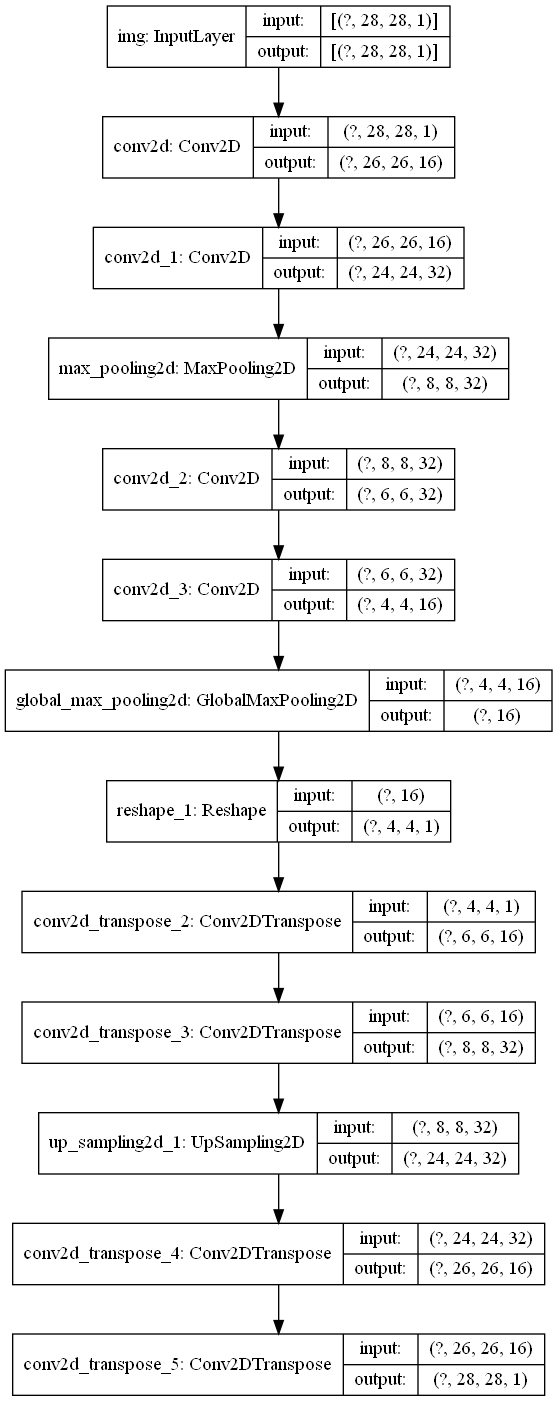

In [15]:
keras.utils.plot_model(autoencoder,'autoencoder.png',show_shapes=True)

the decoding architecture is strictly symmetrical to the encoding architecture, so the output shape is the same as the input shape (28, 28, 1).

The reverse of a <b>Conv2D</b> layer is a <b>Conv2DTranspose</b> layer, and the reverse of a  </b>MaxPooling2D layer is an </b>UpSampling2D</b> layer.